# Laboratorio 3

-  [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel)

#####  LINK DE REPOSITORIO
https://github.com/FabianKel/LAB3-IA

## Task 1 - Preguntas Teóricas

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de
gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

| Método                        | Descripción                                                                 | Ventajas                                                                 | Desventajas                                                                 |
|-------------------------------|---------------------------------------------------------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------------|
| Descenso de Gradiente         | Minimiza el error de predicción de un modelo donde va recorriendo con la diferencia entre el resultado obtenido y el que se busca obtener | Convergencia precisa y estable.                                           | Puede ser lento para grandes conjuntos de datos.                           |
| Descenso de Gradiente Estocástico | Actualiza los parámetros usando un solo ejemplo en cada iteración. Donde seleciona na observación aleatoria para minimizar la función de pérdida         | Rápido y puede escapar de mínimos locales.                                | Es menos precisa.                                      |
| Descenso de Gradiente por Mini Batches | Actualiza los parámetros usando un pequeño subconjunto de datos en cada iteración. | Balance entre velocidad y precisión, y aprovecha la paralelización.       | Selección del tamaño del mini batch puede ser complicada.                  |

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature
selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

### Feature Extraction
Se transforman las features originales en nuevas features, disminuyendo la dimensión pero siempre manteniendo información relevante.
##### Técnicas:
* PCA (Principle Componemts Analysis):
    * Encuentra combinaciones lineales ortogonales de las features originales que maximizan la varianza.
* ICA (Independent Component Analysis):
    * Separa señales en componentes estadísticamente independientes, es útil cuando las fuentes son no gaussianas
    
##### Ventajas:
* El dataset es menos complejo
* Requiere menos espacio y menos tiempo de computación
* Hay menos chances de causar ```overfitting``` en el modelo


### Feature Selection
Como dice el nombre, se trata de seleccionar un subconjunto de las características originales basado en su relevancia para el modelo.
##### Técnicas:
* Filtrado (Pearson):
    * Mide la correlación lineal entre cada característica y la variable objetivo. Selecciona las características con valores absolutos de correlación más altos.
        * Simplicidad: Fácil de calcular e interpretar.
        * Velocidad: Computacionalmente eficiente (O(n)).
* Anova F-Value:
    * Evalúa la diferencia de medias de las características entre las clases de la variable objetivo. Usa el estadístico F para priorizar características con mayor separación entre grupos.
        * Efectivo para clasificación.
        * Maneja características no lineales si hay diferencias de medias significativas.
* Wrapper (RFE):
    * Entrena un modelo (e.g., SVM) y elimina iterativamente las características menos importantes según los pesos del modelo.
        * Depende del modelo base (si el SVM es malo, RFE también)
        * Adaptado al modelo final, mejorando generalización.

##### Ventajas:
* Se mantienen las features originales.
* Tiene más eficiencia Computacional
* Se reduce el ```overfitting```

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin
backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

#### Arquitectura y Funcionamiento de un Perceptrón de una sola capa

Es el modelo más básico de una red neuronal artificial, propuesto por Frank Rosenblatt en 1957 y es la base de modelos más complejos como las redes neuronales multicapa.

##### Arquitectura
1. Capa de Entrada:
    * Recibe los valores de las features del dato de entrada.
2. Pesos y Sesgo (Bias):
    * Cada característica tiene un peso, el cuál se ajusta a su importancia en la predicción.
    * Hay un sesgo que actúa como un umbral de activación

##### Funcionamiento
1. Entrada:
    * Se alimentan las características:
     $$ x = [x_{1}, x_{2}, ..., x_n] $$
    * Suma Ponderada
    $$ z = \sum_{i=1}^{n} w_i x_i + b $$
    * Aplicar la función escalón:
    $$ y = f(z) = \begin{cases} 1 & \text{si } z \geq 0, \\ 0 & \text{en otro caso} \end{cases} $$ 
    * ```y``` es la predicción final

##### Aprendizaje
El perceptrón ajusta sus pesos y sesgo para minimizar los errores de clasificación mediante un enfoque supervisado.
1. Inicialización:
    * Los pesos y el sesgo se inicializan aleatoriamente
2. Actualización de Parámetros:
    * Para cada muestra (x, y) en el dataset:
        * Calcula la predicción y
        * Si la predicción final no es correcta,  se actualizan los pesos y el sesgo de la siguiente manera:
        $$ w_i <- w_i + η * (y_{true} - y) * x_i $$
        $$ b <- b + η * (y_{true} - y) $$
        *  donde ```w``` es el peso, ```b``` es el sesgo y ```η``` es el learning rate.
3. Convergencia:
    * Repite el proceso hasta que no haya errores o se alcance el límite de iteraciones.
 


#### Referencias:
- Machine Learning: Feature Selection and Extraction with Examples https://medium.com/nerd-for-tech/machine-learning-feature-selection-and-extraction-with-examples-80e3e2c2e1a1
- Feature Extraction Techniques https://medium.com/towards-data-science/feature-extraction-techniques-d619b56e31be
- ¿Qué es el descenso del gradiente? https://www.ibm.com/es-es/topics/gradient-descent

## Task 2 - Ejercicios Prácticos

### Task 2.1 - Gradiente Descendiente Estocástico

Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini
batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos
solicitados y la distribución real de puntos. Para esto considere que:
* El polinomio que debe usar es 2 * x^3 - 3 * x^2 + 5 * x + 3
* Considere el uso de ```np.polyval```
* Considere el uso de ```np.polyder```
* Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método
fue más rápido y por qué.
* Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De
esto mencione cuál método lo hizo mejor y por qué

### **Importar las librerías a utilizar** 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline


### **Generar datos**

In [22]:
np.random.seed(1326)
x = np.linspace(-2, 4, 100)
y_real = 2*x**3 - 3*x**2 + 5*x + 3
y = y_real + np.random.normal(0, 5, 100)

### **Evaluar polinomio y obtener derivada**

In [23]:
polynomial = np.poly1d([2, -3, 5, 3])  # 2x³ - 3x² + 5x + 3
derivative = np.polyder(polynomial)  

### **Calcular el error mediante MSE**

In [24]:

def get_loss(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

### **Gradiente Descendiente**

In [25]:
def gd(x, y, learning_rate=0.00005, iterations=1000):
    coefficients = np.random.randn(4)
    errors = []
    start_time = time.time()
    
    for _ in range(iterations):
        y_pred = np.polyval(coefficients, x)
        grad = np.mean([(y_pred[i] - y[i]) * np.polyval(derivative, x[i]) for i in range(len(x))], axis=0)
        coefficients -= learning_rate * grad
        errors.append(get_loss(y, y_pred))
    
    return coefficients, errors, time.time() - start_time

### **Descenso de Gradiente Estocástico**

In [26]:
# Gradiente Descendente Estocástico (SGD)
def sgd(x, y, learning_rate=0.00005, iterations=1000):
    coefficients = np.random.randn(4)
    errors = []
    start_time = time.time()
    
    for _ in range(iterations):
        idx = np.random.randint(len(x))  # Seleccionar un punto aleatorio
        x_i, y_i = x[idx], y[idx]
        y_pred = np.polyval(coefficients, x_i)
        grad = (y_pred - y_i) * np.polyval(derivative, x_i)
        coefficients -= learning_rate * grad
        errors.append(get_loss(y, np.polyval(coefficients, x)))
    
    return coefficients, errors, time.time() - start_time

### **Mini-Batch Gradiente Descendente**

In [27]:
# Mini-Batch GD
def mini_batch_gd(x, y, batch_size=20, learning_rate=0.00005, iterations=1000):
    coefficients = np.random.randn(4)
    errors = []
    start_time = time.time()
    
    for _ in range(iterations):
        indices = np.random.choice(len(x), batch_size, replace=False)
        x_batch, y_batch = x[indices], y[indices]
        y_pred = np.polyval(coefficients, x_batch)
        grad = np.mean([(y_pred[i] - y_batch[i]) * np.polyval(derivative, x_batch[i]) for i in range(len(x_batch))], axis=0)
        coefficients -= learning_rate * grad
        errors.append(get_loss(y, np.polyval(coefficients, x)))
    
    return coefficients, errors, time.time() - start_time


### **Ejecución de métodos**

In [28]:
coefficients_gd, errors_gd, time_gd = gd(x, y)
coefficients_sgd, errors_sgd, time_sgd = sgd(x, y)
coefficients_mb, errors_mb, time_mb = mini_batch_gd(x, y)

### **Graficar resultados**

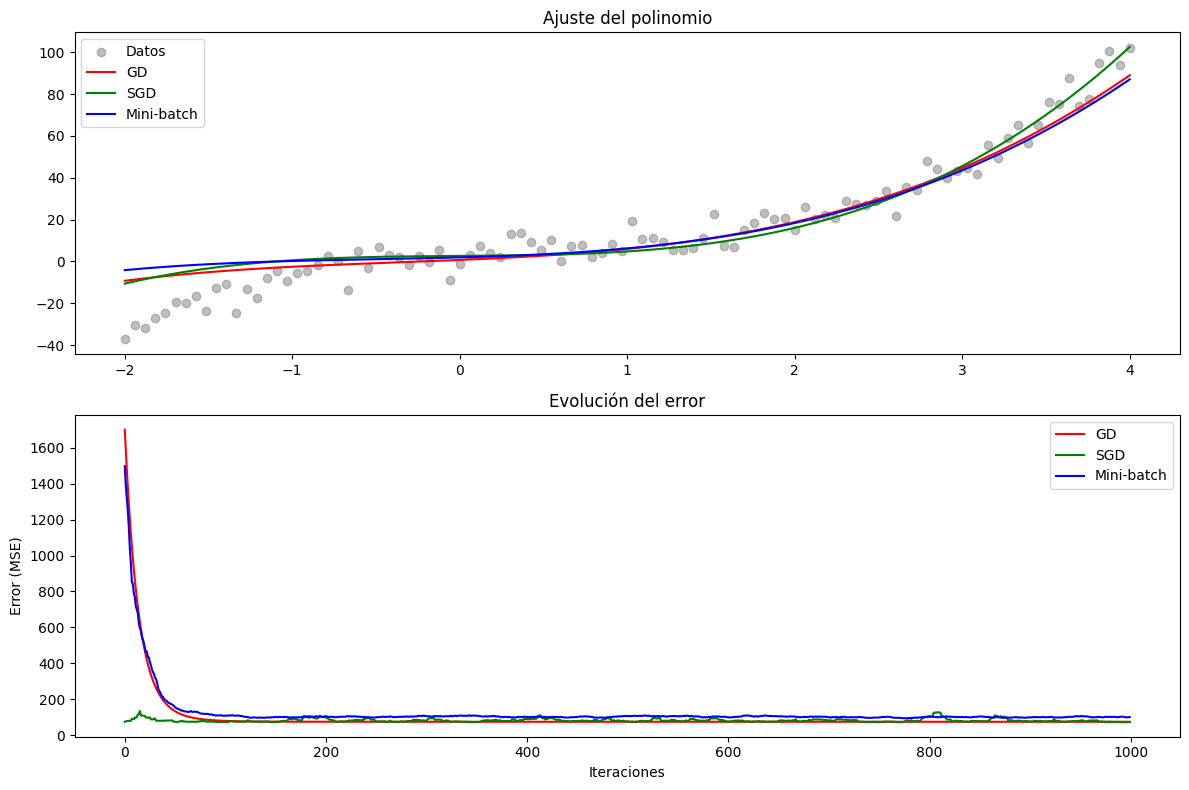

In [29]:
# Graficar resultados
plt.figure(figsize=(12, 8))

# Gráfica de ajuste
plt.subplot(2, 1, 1)
plt.scatter(x, y, color='gray', alpha=0.5, label='Datos')
x_plot = np.linspace(min(x), max(x), 200)
plt.plot(x_plot, np.polyval(coefficients_gd, x_plot), 'r-', label='GD')
plt.plot(x_plot, np.polyval(coefficients_sgd, x_plot), 'g-', label='SGD')
plt.plot(x_plot, np.polyval(coefficients_mb, x_plot), 'b-', label='Mini-batch')
plt.legend()
plt.title('Ajuste del polinomio')

# Gráfica de errores
plt.subplot(2, 1, 2)
plt.plot(errors_gd, 'r-', label='GD')
plt.plot(errors_sgd, 'g-', label='SGD')
plt.plot(errors_mb, 'b-', label='Mini-batch')
plt.xlabel('Iteraciones')
plt.ylabel('Error (MSE)')
plt.legend()
plt.title('Evolución del error')

plt.tight_layout()
plt.show()

### **Mostrar resultados**

In [30]:
print("Tiempos de ejecución:")
print(f"Gradiente Descendente: {time_gd:.4f} segundos")
print(f"SGD: {time_sgd:.4f} segundos")
print(f"Mini-batch GD: {time_mb:.4f} segundos")

print("\nError final (MSE):")
print(f"Gradiente Descendente: {errors_gd[-1]:.4f}")
print(f"SGD: {errors_sgd[-1]:.4f}")
print(f"Mini-batch GD: {errors_mb[-1]:.4f}")

Tiempos de ejecución:
Gradiente Descendente: 2.2165 segundos
SGD: 0.0880 segundos
Mini-batch GD: 0.4771 segundos

Error final (MSE):
Gradiente Descendente: 74.2915
SGD: 72.7207
Mini-batch GD: 100.8240


### **Comparación del tiempo de ejecución**

Como era de esperarse, SGD fue el más rápido, seguido por Mini-Batch GD y finalmente el Gradiente Descendente. Esto se debe a la cantidad de datos y la manera en la que los procesa en cada iteración:

- GD (Gradiente Descendente): Actualiza los coeficientes usando todo el conjunto de datos en cada iteración, lo que es computacionalmente más costoso.
- SGD (Gradiente Descendente Estocástico): Toma solo un punto aleatorio en cada iteración, lo que reduce el tiempo de ejecución.
- Mini-Batch GD: Se encuentra entre ambos métodos, ya que usa pequeños batches o conjunto de datos, lo que lo hace más eficiente que GD pero más costoso que SGD.

### **Comparación del Fitness**

El método con el menor error final (MSE) fue el SGD, lo que indica que produjo el mejor ajuste a los datos en términos de error medio cuadrático. Sin embargo, la diferencia entre GD y SGD no es significativa, lo que indica que ambos métodos convergieron a soluciones bastante similares. Por otro lado, el Mini-Batch GD tuvo el peor desempeño en términos de error, lo que sugiere que el tamaño del batch o el learning rate podrían no ser óptimos para el modelo.

### Task 2.2 - Feature Selection

Tome de nuevo el dataset del laboratorio pasado referente a la clasificación de Partidas de League of Legends.

Sobre este aplique al menos 3 técnicas de feature selection distintas, y con el dataset resultante vuelva a ajustar el modelo de Support Vector Machine (de la librería Sklearn).

Recuerde que:
* Debe definir una métrica de desempeño y justificar el por qué de esta métrica
* Mida el performance de su modelo con las tres técnicas de feature selection y compare cada una de ellas. Es decir, debe tener al menos 4 valores a comparar (el obtenido en el laboratorio pasado, y al menos 3 de las técnicas de feature selection)
* De las medidas obtenidas, diga qué versión lo hizo mejor y por qué.
* Recuerde que para hacer parameter tuning, deben usar las mismas columnas seleccionadas después del
feature selection
* Recuerde que su variable objetivo es “blueWins”

### **Importación dataset y librerías**

In [31]:
# Manipulación y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Métrica de evaluación
from sklearn.metrics import accuracy_score

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Modificar máximo de columnas
pd.set_option('display.max_columns', None)

### **Importación del Dataset**

In [32]:
data = pd.read_csv('high_diamond_ranked_10min.csv')

### **Preprocesamiento del laboratorio anterior**

In [33]:
# Excluir columnas innecesarias
df = data.drop(["gameId","blueGoldPerMin","redGoldPerMin"], axis=1)

# Separar la variable objetivo
np.set_printoptions(suppress=True)
Xcolumns = df.iloc[:, 1:].columns.values
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

# Data Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=48)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=48)

# Escalado de Variables
X_train_df = pd.DataFrame(X_train, columns=Xcolumns)
X_test_df = pd.DataFrame(X_test, columns=Xcolumns)
X_val_df = pd.DataFrame(X_val, columns=Xcolumns)

sc_X = StandardScaler()
X_train_df = pd.DataFrame(sc_X.fit_transform(X_train_df), columns=Xcolumns)
X_test_df = pd.DataFrame(sc_X.transform(X_test_df), columns=Xcolumns)
X_val_df = pd.DataFrame(sc_X.transform(X_val_df), columns=Xcolumns)

#### Técnicas de Feature Selection:

In [34]:
# Técnica 1: Correlación de Pearson
correlaciones = X_train_df.corrwith(pd.Series(Y_train)).abs().sort_values(ascending=False)
features_pearson = correlaciones.head(10).index.tolist()  # Top 10

# Técnica 2: ANOVA F-value
selector_anova = SelectKBest(score_func=f_classif, k=10)
X_train_anova = selector_anova.fit_transform(X_train_df, Y_train)
features_anova = X_train_df.columns[selector_anova.get_support()].tolist()

# Técnica 3: RFE con SVM
svm_rfe = SVC(kernel='linear', C=1)
selector_rfe = RFE(svm_rfe, n_features_to_select=10)
selector_rfe.fit(X_train_df, Y_train)
features_rfe = X_train_df.columns[selector_rfe.support_].tolist()

In [35]:
# Función para entrenar y evaluar
def evaluar_modelo(features):
    print("Features a evaluar:\n", features)
    X_train_sel = X_train_df[features]
    X_test_sel = X_test_df[features]
    
    model = SVC(kernel='linear', C=1)
    model.fit(X_train_sel, Y_train)
    
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(Y_test, y_pred)
    print(acc)
    return acc

accuracy_original = 0.7206  # Obtenido en el laboratorio anterior

# Accuracy con cada técnica
accuracy_pearson = evaluar_modelo(features_pearson)
accuracy_anova = evaluar_modelo(features_anova)
accuracy_rfe = evaluar_modelo(features_rfe)

print("------------ Resumen Final ------------")
print("Accuracy Original:\n",accuracy_original)
print("Accuracy Pearson:\n",accuracy_pearson)
print("Accuracy Anova:\n",accuracy_anova)
print("Accuracy RFE:\n",accuracy_rfe)

Features a evaluar:
 ['redGoldDiff', 'blueGoldDiff', 'redExperienceDiff', 'blueExperienceDiff', 'blueTotalGold', 'redTotalGold', 'blueTotalExperience', 'redTotalExperience', 'blueAvgLevel', 'redAvgLevel']
0.7236842105263158
Features a evaluar:
 ['blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff', 'blueExperienceDiff', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redGoldDiff', 'redExperienceDiff']
0.7236842105263158
Features a evaluar:
 ['blueDragons', 'blueTotalGold', 'blueTotalExperience', 'blueGoldDiff', 'blueExperienceDiff', 'redDragons', 'redTotalGold', 'redTotalExperience', 'redGoldDiff', 'redExperienceDiff']
0.7246963562753036
------------ Resumen Final ------------
Accuracy Original:
 0.7206
Accuracy Pearson:
 0.7236842105263158
Accuracy Anova:
 0.7236842105263158
Accuracy RFE:
 0.7246963562753036


#### **Análisis de Resultados**
A continuación se presentaran las diferencias de las técnicas implementadas:

<center>

|    Técnica    |    Accuracy   | Num. Features |     Observación     |
| ------------- | ------------- |-------------- | ------------------- |
| **Original**  |    72.06%     |       37      | Se utilizaron todas las features |
| **Pearson**   |    72.37%     |       10      | Incluye Features de diferencia de puntuaciones en la partida |
| **ANOVA**     |    72.37%     |       10      | Mismas Features que **Pearson**  |
| **RFE**       |    72.47%     |       10      | Incluye Features de los objetivos tomados por los equipos|

</center>

* RFE utiliza el propio SVM para evaluar la importancia de las características, capturando iteraciones no lineales entre variables. Mientras que Pearson y ANOVA solo miden las relaciones individuales con ```blueWins```
* Como se menciona en la tabla, ```RFE``` incluyó las features que describen las ventajas obtenidas durante el juego, mientras que ```Pearson``` y ```ANOVA``` se enfocaron más en describir las diferencias de estadísticas de economía o puntos de experiencia en el juego.

#### Comparación directa
* Pearson vs ANOVA:
    * Ambas técnicas dieron el mismo accuracy (72.37%), debido a que seleccionaron las mismas features. Esto sugiere que las diferencias de oro y experiencia entre los equipos son críticas para predecir qué equipo gana, pero al mismo tiempo demuestra que no aportan información nueva al incluirse todas juntas.
    * RFE vs Original:
        * El modelo con RFE superó al original por **0.41%** utilizando **27** features menos. Lo cuál demuestra que la mayoría de las 37 caracterísitcas originales eran redundantes o irrelevantes.

### **Conclusión Final**
En este caso es recomendable utilizar el método de **RFE** ya que nos brindó un mejor accuracy y mejor eficiencia comparado al modelo original.
Además las features seleccionadas demuestran la importancia de ciertos objetivos en el juego que le brindan ciertas ventajas al equipo que los alcanza.

### Task 2.3 - Perceptrón

Implemente un perceptrón de una sola capa para realizar una clasificación binaria del dataset de Iris(incluido en ```sklearn.datasets.load_iris```). Visualice la frontera de decisión que fue aprendida por el perceptrón.
Recuerde que:
* Debe cargar el dataset de Iris desde la librería mencionada
* Use solamente dos features, siendo estos sepal length y sepal width
* Asegúrese de que su clase Perceptron tenga los métodos de fit y predict
* Visualice la frontera de decisión
    * El eje Y debería ser sepal width y el eje X debería ser sepal length
* Debe definir una métrica de desempeño y justificar el por qué de esta métrica. Con dicha métrica, evalúe el rendimiento de su modelo. Es decir, diga si lo hizo bien o no y el por qué.

### **Importación dataset y librerías**

In [36]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### **Carga y prueba de datos**

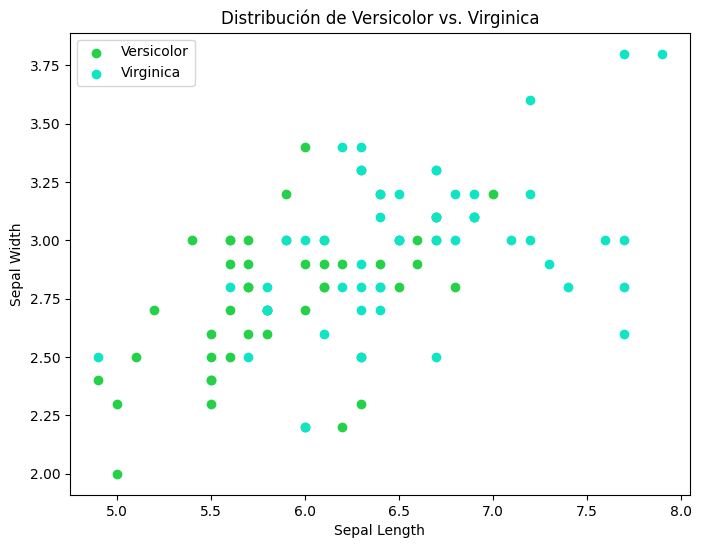

In [37]:
# Dataset Iris
iris = load_iris()

# sepal length y sepal width
X = iris.data[:, [0, 1]]

# Filtrar Versicolor (1) y Virginica (2)
mask = (iris.target == 1) | (iris.target == 2)
X = X[mask]
y = iris.target[mask]

# Convertir las etiquetas a binario: Versicolor (0) y Virginica (1)
y = (y == 2).astype(int)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='#24d149', label='Versicolor')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='#0fe5c4', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Distribución de Versicolor vs. Virginica')
plt.legend()
plt.show()

### **Escalamiento de datos**

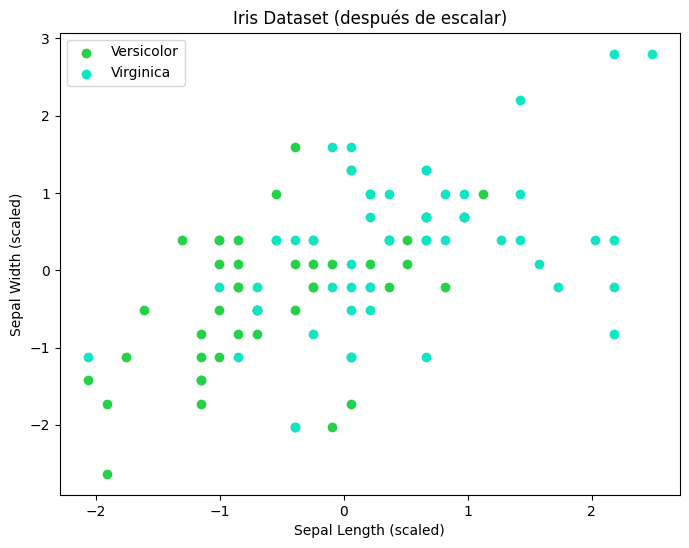

In [38]:
# Escalar los features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos escalados
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='#24d149', label='Versicolor')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='#0fe5c4', label='Virginica')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Iris Dataset (después de escalar)')
plt.legend()
plt.show()

In [39]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Entrenamiento
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = 1 if linear_output >= 0 else 0
                
                # Actualizar 
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

### **División de datos**

In [40]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Forma del conjunto de entrenamiento:", X_train.shape)
print("Forma del conjunto de prueba:", X_test.shape)

Forma del conjunto de entrenamiento: (80, 2)
Forma del conjunto de prueba: (20, 2)


### **Perceptrón | Métrica de desempeño**

In [41]:
# Crear y entrenar el perceptrón
perceptron = Perceptron(learning_rate=0.01, n_iterations=100)
perceptron.fit(X_train, y_train)

# Hacer predicciones
y_pred = perceptron.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.70

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.57      1.00      0.73         8

    accuracy                           0.70        20
   macro avg       0.79      0.75      0.70        20
weighted avg       0.83      0.70      0.69        20



El uso de **accuracy** como métrica de desempeño es apropiado en este caso porque estamos realizando una clasificación binaria y las clases Versicolor y Virginica tienen un número similar de muestras en el dataset original (las clases se encuentran balanceadas), lo que ayuda a evitar sesgos en la evaluación. El accuracy obtenido fue de 0.70 (70%), lo que indica que el perceptrón clasificó correctamente el 70% de los datos de prueba. Esto nos da un indicio que se puede mejorar el modelo, de manera que pueda realizar predicciones más precisas para la clasificación de las observaciones en las diferentes clases.

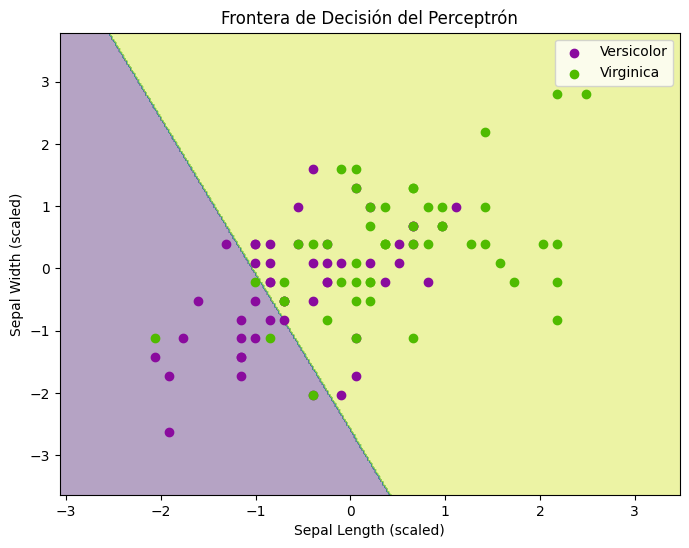

In [42]:
# Crear una malla para visualizar la frontera de decisión
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

# Predicciones en la malla
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafica
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='#8a0b9e', label='Versicolor')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='#50bb00', label='Virginica')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Frontera de Decisión del Perceptrón')
plt.legend()
plt.show()

El desempeño del modelo se debe a que Versicolor y Virginica no son clases completamente separables con un modelo lineal utilizando únicamente sepal length y sepal width. Esto se evidencia en que hay observaciones de un grupo que se encuentran dentro del área del otro grupo de especies.

## Referencias 

Mini-batch Gradient Descent. (s/f). Interactivechaos.com. https://interactivechaos.com/es/manual/tutorial-de-deep-learning/mini-batch-gradient-descent

Qué es Descenso de gradiente estocástico (SGD) Concepto y definición. Glosario. (s/f). GAMCO, SL. Recuperado el 9 de febrero de 2025, de https://gamco.es/glosario/descenso-de-gradiente-estocastico-sgd/

¿Qué es el descenso del gradiente? (2024, abril 25). Ibm.com. https://www.ibm.com/mx-es/topics/gradient-descent